In [1]:
import os
import sys

In [154]:
import pandas as pd
import glob
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.backends.backend_pdf
from matplotlib.backends.backend_pdf import PdfPages

%matplotlib inline 


# Seaborn visualization library
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.datasets.samples_generator import make_blobs
from sklearn.cluster import KMeans

from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LassoCV
from sklearn.ensemble import RandomForestClassifier

import scipy

import seaborn as seabornInstance 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression

from sklearn.preprocessing import PolynomialFeatures
from sklearn import metrics

import statsmodels.api as sm
from scipy import stats

import lxml
from io import StringIO 
import pickle

In [3]:
pd.set_option('display.max_columns', 1000)
pd.options.display.max_rows=1000

pd.set_option('display.width', 1000)
pd.set_option('display.max_colwidth', 1000)

plt.rcParams.update({'figure.max_open_warning': 0})


In [226]:
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

# import scripts.supervised_prep
from scripts.supervised_prep import test_print
from scripts.supervised_prep import dataprep_X
from scripts.supervised_prep import dataprep_Y
from scripts.supervised_prep import results_summary_to_dataframe

from fuzzywuzzy import process

In [5]:
test_print(2)

1


In [6]:
def fuzzy(x, SERIES):
    closest_match = process.extractOne(x, SERIES.values)[0]
    index = pd.Index(SERIES).get_loc(closest_match)
    return index

# Load Data

In [210]:
inroot = r"../data/input/07 Samsung UX Index - Web App Implementation/"
fname_data = inroot + r"Samsung UX Index Survey_Data.csv"
df_data = pd.read_csv(fname_data)
fname_vaxmap = inroot + r"Samsung UX Index Survey_Datamap.xlsx"
df_varmap = pd.read_excel(fname_vaxmap, header=1, sheet_name=0)
df_valmap = pd.read_excel(fname_vaxmap, header=1, sheet_name=1)



/usr/local/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3057: DtypeWarning: Columns (1218) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [8]:
df_addmap1 = pd.read_csv(inroot+"../additional_mapping/qxbrandxtrustxdrivers_quaitydrivers.csv")
df_addmap1.head()

,qxbrandxtrustxdrivers,Tag,quality_indicator,qxoverallxqualityxindicators,driver_category
0,qxbrandxtrustxdrivers_1,Transparent,Trust,qxoverallxqualityxindicators_1,Brand-Specific
1,qxbrandxtrustxdrivers_2,Ethical,Trust,qxoverallxqualityxindicators_1,Brand-Specific
2,qxbrandxtrustxdrivers_3,Respectful,Trust,qxoverallxqualityxindicators_1,Brand-Specific
3,qxbrandxtrustxdrivers_4,Integrity / honest,Trust,qxoverallxqualityxindicators_1,Brand-Specific
4,qxdrivers_1,Safe / secure,Trust,qxoverallxqualityxindicators_1,Core UX Principles


In [9]:
df_varmap[df_varmap.Variable.str.contains('d7_4')]

,Variable,Label,Short Label,Type,Minimum,Maximum,Description
1223,d7_4,D7. Asian or Asian American - What is your race?,NaN,integer,0.0,1.0,NaN


# Activities Mapping

In [10]:
df_actmap = pd.read_csv("../data/input/data_engineering/activities_map.csv")
df_varmap_activ = pd.read_csv("../data/input/data_engineering/df_varmap_activities_map.csv")

In [11]:
# df_varmap_activ = df_varmap[df_varmap.Variable.str.contains('activities')].copy()
# df_varmap_activ['match'] = df_varmap_activ['Label'].apply(fuzzy,  SERIES=df_actmap.Task)

In [12]:
# df_varmap_activ.loc[df_varmap_activ.Label.str.contains('Using speaker phone'),'match'] = 0
# df_varmap_activ.loc[df_varmap_activ.Label.str.contains('Charging battery'),'match'] = 1
# df_varmap_activ.loc[df_varmap_activ.Label.str.contains('Transferring files'),'match'] = 2
# df_varmap_activ.loc[df_varmap_activ.Label.str.contains('Unlocking'),'match'] = 3
# df_varmap_activ.loc[df_varmap_activ.Label.str.contains('Viewing screen'),'match'] = 4
# df_varmap_activ.loc[df_varmap_activ.Label.str.contains('Setting up multiple windows'),'match'] = 5
# df_varmap_activ.loc[df_varmap_activ.Label.str.contains('Organizing your home screen'),'match'] = 6
# df_varmap_activ.loc[df_varmap_activ.Label.str.contains('Using your quick settings'),'match'] = 7
# df_varmap_activ.loc[df_varmap_activ.Label.str.contains('Customizing settings'),'match'] = 8
# df_varmap_activ.loc[df_varmap_activ.Label.str.contains('Setting up and managing notifications'),'match'] = 9
# df_varmap_activ.loc[df_varmap_activ.Label.str.contains('Searching for something on your smartphone'),'match'] = 10
# df_varmap_activ.loc[df_varmap_activ.Label.str.contains('Scheduling a calendar event'),'match'] = 11
# df_varmap_activ.loc[df_varmap_activ.Label.str.contains('Setting an alarm'),'match'] = 12
# df_varmap_activ.loc[df_varmap_activ.Label.str.contains('Sending and receiving a text message'),'match'] = 13
# df_varmap_activ.loc[df_varmap_activ.Label.str.contains('rear-facing camera'),'match'] = 14
# df_varmap_activ.loc[df_varmap_activ.Label.str.contains('front-facing camera'),'match'] = 15
# df_varmap_activ.loc[df_varmap_activ.Label.str.contains('Recording a video'),'match'] = 16
# df_varmap_activ.loc[df_varmap_activ.Label.str.contains('Editing a photo'),'match'] = 17
# df_varmap_activ.loc[df_varmap_activ.Label.str.contains('Sharing a photo or file'),'match'] = 18
# df_varmap_activ.loc[df_varmap_activ.Label.str.contains('Using GPS'),'match'] = 19
# df_varmap_activ.loc[df_varmap_activ.Label.str.contains('Tracking your wellbeing'),'match'] = 20
# df_varmap_activ.loc[df_varmap_activ.Label.str.contains('Creating and editing a note'),'match'] = 21
# df_varmap_activ.loc[df_varmap_activ.Label.str.contains('Making a mobile payment'),'match'] = 22
# df_varmap_activ.loc[df_varmap_activ.Label.str.contains('Asking digital assistant a question'),'match'] = 23
# df_varmap_activ.loc[df_varmap_activ.Label.str.contains('Using an AR'),'match'] = 24


In [13]:
# df_varmap_activ.groupby('match')['Variable'].count()

In [14]:
# df_varmap_activ = df_varmap_activ.merge(df_actmap, left_on='match',
#                                         right_index=True, how='left')

In [15]:
# df_varmap_activ.to_csv("../data/input/data_engineering/df_varmap_activities_map.csv", index=False)

# merge on df_data

In [16]:
df_data = pd.read_csv("../data/input/data_engineering/df_data.csv")


In [17]:
# df_activmatrix = df_varmap_activ[['Variable','Advanced','Social','Productivity']].copy().set_index('Variable')
# df_activmatrix = df_activmatrix.transpose()

In [18]:
# df_data.loc[:,'Activitiesximportance_Advanced'] = df_data.filter(like='activities', 
#                axis=1).apply(pd.to_numeric, errors='coerce').multiply(
#                df_activmatrix.loc['Advanced']).filter(like='qxactivitiesximportance', 
#                axis=1).sum(axis=1, skipna=True)
# df_data.loc[:,'Activitiesximportance_Social'] = df_data.filter(like='activities', 
#                axis=1).apply(pd.to_numeric, errors='coerce').multiply(
#                df_activmatrix.loc['Social']).filter(like='qxactivitiesximportance', 
#                axis=1).sum(axis=1, skipna=True)
# df_data.loc[:,'Activitiesximportance_Productivity'] = df_data.filter(like='activities', 
#                axis=1).apply(pd.to_numeric, errors='coerce').multiply(
#                df_activmatrix.loc['Productivity']).filter(like='qxactivitiesximportance', 
#                axis=1).sum(axis=1, skipna=True)

# df_data.loc[:,'Activitiesxqualityxindicators_Advanced'] = df_data.filter(like='activities', 
#                axis=1).apply(pd.to_numeric, errors='coerce').multiply(
#                df_activmatrix.loc['Advanced']).filter(like='qxactivitiesxqualityxindicators', 
#                axis=1).sum(axis=1, skipna=True)
# df_data.loc[:,'Activitiesxqualityxindicators_Social'] = df_data.filter(like='activities', 
#                axis=1).apply(pd.to_numeric, errors='coerce').multiply(
#                df_activmatrix.loc['Social']).filter(like='qxactivitiesxqualityxindicators', 
#                axis=1).sum(axis=1, skipna=True)
# df_data.loc[:,'Activitiesxqualityxindicators_Productivity'] = df_data.filter(like='activities', 
#                axis=1).apply(pd.to_numeric, errors='coerce').multiply(
#                df_activmatrix.loc['Productivity']).filter(like='qxactivitiesxqualityxindicators', 
#                axis=1).sum(axis=1, skipna=True)

# df_data.loc[:,'Activitiesxsatisfaction_Advanced'] = df_data.filter(like='activities', 
#    axis=1).apply(pd.to_numeric, errors='coerce').multiply(
#     df_activmatrix.loc['Advanced']).filter(like='qxactivitiesxsatisfaction', 
#                axis=1).sum(axis=1, skipna=True)
# df_data.loc[:,'Activitiesxsatisfaction_Social'] = df_data.filter(like='activities', 
#    axis=1).apply(pd.to_numeric, errors='coerce').multiply(
#     df_activmatrix.loc['Social']).filter(like='qxactivitiesxsatisfaction', 
#                axis=1).sum(axis=1, skipna=True)
# df_data.loc[:,'Activitiesxsatisfaction_Productivity'] = df_data.filter(like='activities', 
#    axis=1).apply(pd.to_numeric, errors='coerce').multiply(
#     df_activmatrix.loc['Productivity']).filter(like='qxactivitiesxsatisfaction', 
#                axis=1).sum(axis=1, skipna=True)

# df_data.loc[:,'Activitiesxdrivers_Advanced'] = df_data.filter(like='activities', 
#    axis=1).apply(pd.to_numeric, errors='coerce').multiply(
#     df_activmatrix.loc['Advanced']).filter(like='qxactivitiesxdrivers', 
#                axis=1).sum(axis=1, skipna=True)
# df_data.loc[:,'Activitiesxdrivers_Social'] = df_data.filter(like='qxactivitiesxdrivers', 
#    axis=1).apply(pd.to_numeric, errors='coerce').multiply(
#     df_activmatrix.loc['Social']).filter(like='qxactivitiesxdrivers', 
#                axis=1).sum(axis=1, skipna=True)
# df_data.loc[:,'Activitiesxdrivers_Productivity'] = df_data.filter(like='activities', 
#    axis=1).apply(pd.to_numeric, errors='coerce').multiply(
#     df_activmatrix.loc['Productivity']).filter(like='qxactivitiesxdrivers', 
#                axis=1).sum(axis=1, skipna=True)



In [19]:
# df_data.filter(like='Activitiesx', axis=1).describe()

In [20]:
# df_data.to_csv("../data/input/data_engineering/df_data.csv", index=False)

# Define Variables 

In [57]:
print(df_data.filter(like='Activitiesx', axis=1).columns)

Index(['Activitiesximportance_Advanced', 'Activitiesximportance_Social', 'Activitiesximportance_Productivity', 'Activitiesxqualityxindicators_Advanced', 'Activitiesxqualityxindicators_Social', 'Activitiesxqualityxindicators_Productivity', 'Activitiesxsatisfaction_Advanced', 'Activitiesxsatisfaction_Social', 'Activitiesxsatisfaction_Productivity', 'Activitiesxdrivers_Advanced', 'Activitiesxdrivers_Social', 'Activitiesxdrivers_Productivity'], dtype='object')


In [59]:
ohdict = {'qxcurrentxos' :  None,
              'd4' :  None, 
              'd1' : None, 
#               'hidagemodels' : None,
            'qxcurrentxmodel': None,
             'hbrand' : None,
             'hmodelquota' : None,
             'hmodelquota_reordered' : None,
             'Empowered_Customer_Groups' : None}
                 

varlist_X = ['d1',  # gender
             'd2',  # age
             'hbrand', # device brand
#              'hidagemodels', # age group
             'd3_1', 'd3_2',    'd3_3',    'd3_4',    # employment
             'd4', # education
             'd6',    # hispanic
             'd7_1', 'd7_2',    'd7_3',    'd7_4',    'd7_5',    'd7_97',    'd7_99' # race
            ]

In [104]:
df_data.groupby('hbrand')['respid'].count()

hbrand
1     897
2    1264
3     452
4     464
5     177
Name: respid, dtype: int64

# Loop It! Linear Regression

In [130]:
df_list = []
for var_y in df_data.filter(like='Activitiesx', axis=1).columns:
    print (var_y)
    X, df_varmap = dataprep_X (df_data, df_varmap, df_valmap, varlist_X, 
                           ohdict=ohdict)
    Y = dataprep_Y (df_data, var_y)
    regressor = LinearRegression()  
    regressor.fit(X, Y)
    X2 = sm.add_constant(X)
    est = sm.OLS(Y, X2)
    est2 = est.fit()

    df_est = results_summary_to_dataframe(est2)
    df_est[(df_est.pvals<.05)].sort_values('coeff').round(5)
    
    df_temp = df_varmap[['Variable','Label']].merge(df_est[['coeff','pvals']][
        (df_est.index=='const')|(df_est.pvals<.05)].sort_values('pvals').round(5), left_on='Variable', right_index=True, 
                                      how='right')
    df_temp['var_y'] = var_y
    df_list.append(df_temp)
df_lmresults = pd.concat(df_list)
df_lmresults = df_lmresults.drop_duplicates()

Activitiesximportance_Advanced
Activitiesximportance_Social


/usr/local/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
/usr/local/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


Activitiesximportance_Productivity
Activitiesxqualityxindicators_Advanced


/usr/local/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
/usr/local/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


Activitiesxqualityxindicators_Social
Activitiesxqualityxindicators_Productivity


/usr/local/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
/usr/local/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


Activitiesxsatisfaction_Advanced


/usr/local/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


Activitiesxsatisfaction_Social


/usr/local/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
/usr/local/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


Activitiesxsatisfaction_Productivity
Activitiesxdrivers_Advanced


/usr/local/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


Activitiesxdrivers_Social


/usr/local/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


Activitiesxdrivers_Productivity


/usr/local/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [131]:
df_lmresults 

,Variable,Label,coeff,pvals,var_y
1220.0,d7_1,D7. White - What is your race?,-0.29235,0.00000,Activitiesximportance_Advanced
0.0,d4_3,D4. What is the highest level of education you have completed? Some college – no degree,0.11708,0.03404,Activitiesximportance_Advanced
0.0,d4_1,D4. What is the highest level of education you have completed? Some high school or less,-0.35897,0.00038,Activitiesximportance_Advanced
0.0,d4_2,D4. What is the highest level of education you have completed? High school graduate,0.11743,0.03648,Activitiesximportance_Advanced
0.0,d1_4,D1. Are you? Would rather not say,-1.10746,0.01767,Activitiesximportance_Advanced
0.0,hbrand_2,hBrand. Hidden Question - Brand Apple,-0.15908,0.00002,Activitiesximportance_Advanced
0.0,hbrand_3,hBrand. Hidden Question - Brand LG,0.32862,0.00000,Activitiesximportance_Advanced
0.0,hbrand_4,hBrand. Hidden Question - Brand Google,-0.23328,0.00000,Activitiesximportance_Advanced
0.0,hbrand_5,hBrand. Hidden Question - Brand Motorola,0.22490,0.00074,Activitiesximportance_Advanced
NaN,const,NaN,0.12899,0.28358,Activitiesximportance_Advanced


In [ ]:
def color_values(value):
  """
  Colors elements in a dateframe
  green if positive and red if
  negative. Does not color NaN
  values.
  """

  if value < 0:
    color = 'red'
  elif value > 0:
    color = 'green'
  else:
    color = 'black'

  return 'color: %s' % color

In [134]:
np.std(Y)

Activitiesxdrivers_Productivity    1.0
dtype: float64

In [137]:
np.std(df_data['Activitiesximportance_Advanced'])

np.mean(df_data['Activitiesximportance_Advanced'])

63.424093423478794

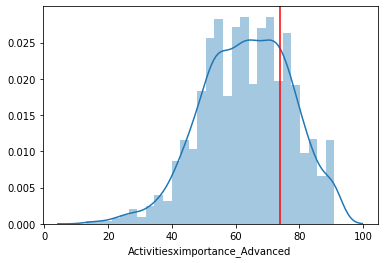

In [141]:
sns.distplot(df_data['Activitiesximportance_Advanced'])
plt.axvline(74.041, 0, 1, color='red')

In [142]:
stats.percentileofscore(df_data['Activitiesximportance_Advanced'],74.041)

77.07437000614628

In [144]:
df_data['Activitiesximportance_Advanced'].quantile(.77)

74.0

# Test Normality

In [87]:
Y_pred = regressor.predict(X)
Y_err = Y-Y_pred

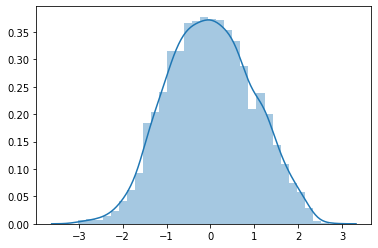

In [88]:
sns.distplot(Y_err)

In [97]:
Y.values[0]

array([-2.58096082])

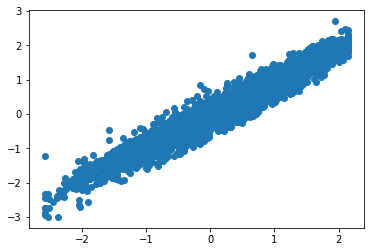

In [103]:
plt.scatter(Y.values, Y_err.values)

In [89]:
scipy.stats.normaltest(Y_err)

NormaltestResult(statistic=array([42.97763896]), pvalue=array([4.65076374e-10]))

# Decision Trees

In [ ]:
from sklearn import tree

clf = tree.DecisionTreeRegressor()
clf = clf.fit(X_train,y_train)

In [ ]:
import graphviz 
dot_data = tree.export_graphviz(clf, out_file='../data/output/tree_unstd.dot',
                                feature_names=X_train.columns,
                               filled=True, rounded= True, max_depth = 5) 

In [ ]:
!dot -Tpng ../data/output/tree_unstd.dot -o ../data/output/tree_unstd.png

In [ ]:
![title]("../data/output/tree.png")

# Rerun Lat Var 

In [152]:
print(df_data.filter(like='Activitiesx', axis=1).columns)

Index(['Activitiesximportance_Advanced', 'Activitiesximportance_Social', 'Activitiesximportance_Productivity', 'Activitiesxqualityxindicators_Advanced', 'Activitiesxqualityxindicators_Social', 'Activitiesxqualityxindicators_Productivity', 'Activitiesxsatisfaction_Advanced', 'Activitiesxsatisfaction_Social', 'Activitiesxsatisfaction_Productivity', 'Activitiesxdrivers_Advanced', 'Activitiesxdrivers_Social', 'Activitiesxdrivers_Productivity'], dtype='object')


In [199]:
SuperLabels = ['activitiesximportance',
               'activitiesxquality',
               'activitiesxsatisfaction',
               'activitiesxdrivers']


SuperList = [[ x for x in df_data.columns if 'qxactivitiesximportance' in x ],
                [ x for x in df_data.columns if 'qxactivitiesxqualityxindicators' in x ],
                                 [ x for x in df_data.columns if 'qxactivitiesxsatisfaction' in x ],
                                 [ x for x in df_data.columns if 'qxactivitiesxdrivers' in x ] ]

pc1_comp_list = []
for label, varlist in zip(SuperLabels,SuperList):
    df = df_data[varlist]        
    coerce_cols = df.dtypes[df.dtypes!='int64'].index.to_list()
    df[coerce_cols] = df[coerce_cols].apply(pd.to_numeric, errors='coerce')
    cols_allmissing = df.isna().sum()[df.isna().sum()==3254].index.to_list()
    df = df.drop(cols_allmissing, axis = 1) 
    scaler = StandardScaler().fit(df)
    X = df.copy()
    X[df.columns] = scaler.transform(df)
    X.fillna(0, inplace=True)
    print(label)
    pca = PCA(n_components=5)
    principalComponents = pca.fit_transform(X)
    print (pca.explained_variance_ratio_[0])
    print()
    pc1_comp = pd.DataFrame(pca.components_[0],X.columns)
    pc1_comp = pc1_comp.merge(df_varmap[['Variable','Label','Short Label']], 
                              left_index=True, right_on='Variable')
    pc1_comp['SuperLabel'] = label
    pc1_comp_list.append(pc1_comp)
    pickle.dump( pca, open( '../data/output/'+label+'_pca.p', "wb" ) )

activitiesximportance
0.34751497541706616



/usr/local/lib/python3.7/site-packages/pandas/core/frame.py:3489: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


activitiesxquality
0.3902508887862375



/usr/local/lib/python3.7/site-packages/pandas/core/frame.py:3489: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


activitiesxsatisfaction
0.4674496272714



/usr/local/lib/python3.7/site-packages/pandas/core/frame.py:3489: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


activitiesxdrivers
0.48742259201470056



In [200]:
pc1_MASTER = pd.concat(pc1_comp_list)

In [243]:
index = df_data.index
columns = [label+'_PC1' for label in SuperLabels]
df_data_PC1 = pd.DataFrame(index=index, columns=columns)
df_data_PC1 = df_data_PC1.fillna(0) 

for label, varlist in zip(SuperLabels,SuperList):
    df_temp = df_data.filter(like=label, axis=1).apply(
        pd.to_numeric, errors='coerce').multiply(pc1_MASTER[pc1_MASTER.SuperLabel==label].set_index('Variable')[0]
                                            ).filter(like=label, axis=1).sum(axis=1, skipna=True)
    df_data_PC1[label+'_PC1']=df_temp
    
df_data_PC1.head()

,activitiesximportance_PC1,activitiesxquality_PC1,activitiesxsatisfaction_PC1,activitiesxdrivers_PC1
0,-22.060574,0.000000,0.000000,0.000000
1,-26.382935,-27.014463,-13.661970,-33.371222
2,-21.025246,-24.453845,-10.803175,-27.017103
3,-21.390272,-22.897507,-17.419699,-19.492965
4,-29.367804,-41.689803,-20.702557,-52.269820


### Run Regression

In [315]:
df_list = []
for y_var in ['activitiesxdrivers_PC1', 'activitiesximportance_PC1',
               'activitiesxquality_PC1', 'activitiesxsatisfaction_PC1']:
    print (y_var)
    
    df_data = pd.read_csv(fname_data)
    ohdict = {'qxcurrentxos': None, 'd4': None, 'd1': None, 'qxcurrentxmodel': None, 
              'hbrand': None, 'hmodelquota': None, 'hmodelquota_reordered': None, 
              'Empowered_Customer_Groups': None}
    varlist_X = ['d1', 'd2', 'hbrand', 'd3_1', 'd3_2', 'd3_3', 'd3_4', 'd4', 'd6', 'd7_1', 
                 'd7_2', 'd7_3', 'd7_4', 'd7_5', 'd7_97', 'd7_99']
    
    X, df_varmap = dataprep_X (df_data, df_varmap, df_valmap, varlist_X, ohdict=ohdict)
    Y = dataprep_Y (df_data_PC1, y_var)
    
    regressor = LinearRegression()  
    regressor.fit(X, Y)
    X2 = sm.add_constant(X)
    est = sm.OLS(Y, X2)
    est2 = est.fit()

    df_est = results_summary_to_dataframe(est2)
    df_est[(df_est.pvals<.05)].sort_values('coeff').round(5)
    
    df_temp = df_varmap[['Variable','Label']].merge(df_est[['coeff','pvals']][
        (df_est.index=='const')|(df_est.pvals<.05)].sort_values('pvals').round(5), left_on='Variable', right_index=True, 
                                      how='right')
    df_temp['var_y'] = y_var
    df_list.append(df_temp)
    
df_lmresults_PC = pd.concat(df_list)
df_lmresults_PC = df_lmresults_PC.drop_duplicates() .00001 .001%

activitiesxdrivers_PC1


/usr/local/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3057: DtypeWarning: Columns (1218) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/usr/local/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


activitiesximportance_PC1


/usr/local/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3057: DtypeWarning: Columns (1218) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/usr/local/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


activitiesxquality_PC1


/usr/local/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3057: DtypeWarning: Columns (1218) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/usr/local/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


activitiesxsatisfaction_PC1


/usr/local/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3057: DtypeWarning: Columns (1218) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/usr/local/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [316]:
df_lmresults_PC

,Variable,Label,coeff,pvals,var_y
1220.0,d7_1,D7. White - What is your race?,0.31752,0.00000,activitiesxdrivers_PC1
1223.0,d7_4,D7. Asian or Asian American - What is your race?,0.30894,0.00008,activitiesxdrivers_PC1
1225.0,d7_97,D7. Another race - What is your race?,0.25970,0.03549,activitiesxdrivers_PC1
0.0,d4_3,D4. What is the highest level of education you have completed? Some college – no degree,-0.11079,0.04789,activitiesxdrivers_PC1
0.0,d1_4,D1. Are you? Would rather not say,1.41753,0.00275,activitiesxdrivers_PC1
0.0,d1_1,D1. Are you? Male,-0.09059,0.01881,activitiesxdrivers_PC1
0.0,d1_3,D1. Are you? Non-binary,0.48602,0.03430,activitiesxdrivers_PC1
0.0,hbrand_3,hBrand. Hidden Question - Brand LG,-0.17410,0.00030,activitiesxdrivers_PC1
NaN,const,NaN,-0.28134,0.02110,activitiesxdrivers_PC1
1220.0,d7_1,D7. White - What is your race?,0.17595,0.00452,activitiesximportance_PC1


# Response = UX_Index & UX_Loyalty

In [322]:
# df_list = []
# for y_var in ['UX_Loyalty', 'UXindex', 'speaker_phone_UXI', 	'charging_battery_UXI', 	'transferring_files_UXI',
#               'unlocking_UXI', 	'display_UXI', 	'multiple_windows_UXI', 	'organizing_home_screen_UXI', 	
#               'quick_settings_UXI', 	'customizing_settings_UXI', 	'notifications_UXI', 	'search_phone_UXI',
#               'calendar_events_and_reminders_UXI', 	'alarm_UXI', 	'sending_and_receiving_texts_UXI', 	
#               'rear_camera_UXI', 	'front_camera_UXI', 	'video_recording_UXI', 	'photo_editing_UXI', 	
#               'sharing_UXI', 	'location_services_UXI', 	'tracking_wellbeing_UXI', 	'using_notes_UXI', 	
#               'mobile_payment_UXI', 	'digital_assistant_UXI', 	'AR_shopping_UXI', ]:
#     print (y_var)
    
#     df_data = pd.read_csv(fname_data)
#     ohdict = {'qxcurrentxos': None, 'd4': None, 'd1': None, 'qxcurrentxmodel': None, 
#               'hbrand': None, 'hmodelquota': None, 'hmodelquota_reordered': None, 
#               'Empowered_Customer_Groups': None}
#     varlist_X = ['d1', 'd2', 'hbrand', 'd3_1', 'd3_2', 'd3_3', 'd3_4', 'd4', 'd6', 'd7_1', 
#                  'd7_2', 'd7_3', 'd7_4', 'd7_5', 'd7_97', 'd7_99']
    
#     X, df_varmap = dataprep_X (df_data, df_varmap, df_valmap, varlist_X, ohdict=ohdict)
#     Y = dataprep_Y (df_data, y_var)
    
#     regressor = LinearRegression()  
#     regressor.fit(X, Y)
#     X2 = sm.add_constant(X)
#     est = sm.OLS(Y, X2)
#     est2 = est.fit()

#     df_est = results_summary_to_dataframe(est2)
#     df_est[(df_est.pvals<.05)].sort_values('coeff').round(5)
    
#     df_temp = df_varmap[['Variable','Label']].merge(df_est[['coeff','pvals']][
#         (df_est.index=='const')|(df_est.pvals<.05)].sort_values('pvals').round(5), left_on='Variable', right_index=True, 
#                                       how='right')
#     df_temp['var_y'] = y_var
#     df_list.append(df_temp)
    
df_lmresults_UX = pd.concat(df_list)
df_lmresults_UX = df_lmresults_UX.drop_duplicates()

In [323]:
df_lmresults_UX

,Variable,Label,coeff,pvals,var_y
2.0,d2,D2. What is your age?,0.01694,0.00000,UX_Loyalty
1213.0,d3_2,D3. Employed - Which of the following best describes your current employment status?,0.21561,0.02841,UX_Loyalty
1214.0,d3_3,D3. Retired or otherwise unable to work - Which of the following best describes your current employment status?,0.39467,0.01671,UX_Loyalty
1215.0,d3_4,D3. Not currently employed or in school - Which of the following best describes your current employment status?,0.34053,0.00210,UX_Loyalty
1223.0,d7_4,D7. Asian or Asian American - What is your race?,-0.19084,0.01141,UX_Loyalty
0.0,d4_6,D4. What is the highest level of education you have completed? Post-graduate degree,-0.13673,0.02057,UX_Loyalty
0.0,d1_4,D1. Are you? Would rather not say,-1.07654,0.01838,UX_Loyalty
0.0,d1_3,D1. Are you? Non-binary,-0.47286,0.03280,UX_Loyalty
0.0,hbrand_1,hBrand. Hidden Question - Brand Samsung,0.17804,0.00002,UX_Loyalty
0.0,hbrand_2,hBrand. Hidden Question - Brand Apple,0.11754,0.00142,UX_Loyalty


In [333]:
df_lmresults_UX.loc[2.0].pvals.iloc[0]

0.0

In [340]:
np.std(df_data.UX_Loyalty)*.21


0.2167135502068551

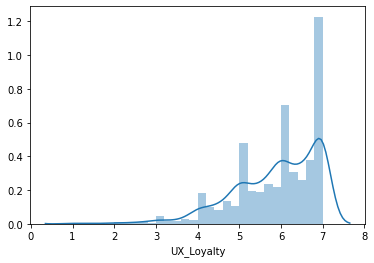

In [337]:
sns.distplot(df_data.UX_Loyalty)